# PlantVillage Preprocessing Report

This notebook was **auto-generated** after running the preprocessing pipeline. It documents dataset structure, class counts, sample images, and the train/val/test split.

**Data root:** `/app/data/processed`  
**Target size:** 224×224  
**Splits:** train / val / test

## Environment Check (paths & splits)

In [1]:
from pathlib import Path
DATA_ROOT = Path('/app/data/processed')
print('Data root:', DATA_ROOT)
if not DATA_ROOT.exists():
    print('WARNING: data root does not exist.')
splits = [p.name for p in DATA_ROOT.iterdir() if p.is_dir()] if DATA_ROOT.exists() else []
print('Splits found:', splits)
for split in ['train', 'val', 'test']:
    p = DATA_ROOT / split
    if p.exists():
        classes = sorted([d.name for d in p.iterdir() if d.is_dir()])
        print(f'{split} classes ({len(classes)}):', classes[:10], '...' if len(classes) > 10 else '')
    else:
        print(split, 'missing')


Data root: /app/data/processed
Splits found: ['test', 'train', 'val']
train classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...
val classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...
test classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...


## Imports

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

%matplotlib inline
DATA_ROOT = Path('/app/data/processed')


## Class Counts (Train / Val / Test)

In [3]:
            # dicts injected by the generator (this script)
            train_counts = {
  "Pepper__bell___Bacterial_spot": 697,
  "Pepper__bell___healthy": 1034,
  "Potato___Early_blight": 700,
  "Potato___Late_blight": 700,
  "Potato___healthy": 106,
  "Tomato_Bacterial_spot": 1488,
  "Tomato_Early_blight": 700,
  "Tomato_Late_blight": 1336,
  "Tomato_Leaf_Mold": 666,
  "Tomato_Septoria_leaf_spot": 1239,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 1173,
  "Tomato__Target_Spot": 982,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 2245,
  "Tomato__Tomato_mosaic_virus": 261,
  "Tomato_healthy": 1113
}
            val_counts   = {
  "Pepper__bell___Bacterial_spot": 150,
  "Pepper__bell___healthy": 222,
  "Potato___Early_blight": 150,
  "Potato___Late_blight": 150,
  "Potato___healthy": 23,
  "Tomato_Bacterial_spot": 319,
  "Tomato_Early_blight": 150,
  "Tomato_Late_blight": 286,
  "Tomato_Leaf_Mold": 143,
  "Tomato_Septoria_leaf_spot": 266,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 251,
  "Tomato__Target_Spot": 211,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 481,
  "Tomato__Tomato_mosaic_virus": 56,
  "Tomato_healthy": 239
}
            test_counts  = {
  "Pepper__bell___Bacterial_spot": 150,
  "Pepper__bell___healthy": 222,
  "Potato___Early_blight": 150,
  "Potato___Late_blight": 150,
  "Potato___healthy": 23,
  "Tomato_Bacterial_spot": 320,
  "Tomato_Early_blight": 150,
  "Tomato_Late_blight": 287,
  "Tomato_Leaf_Mold": 143,
  "Tomato_Septoria_leaf_spot": 266,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 252,
  "Tomato__Target_Spot": 211,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 482,
  "Tomato__Tomato_mosaic_virus": 56,
  "Tomato_healthy": 239
}

            # Build a single DataFrame (missing classes -> 0)
            df = pd.DataFrame({
                'train': train_counts,
                'val': val_counts,
                'test': test_counts
            }).fillna(0).astype(int)

            # Sort columns alphabetically for readability
            df = df.sort_index()
            df


,train,val,test
Pepper__bell___Bacterial_spot,697,150,150
Pepper__bell___healthy,1034,222,222
Potato___Early_blight,700,150,150
Potato___Late_blight,700,150,150
Potato___healthy,106,23,23
Tomato_Bacterial_spot,1488,319,320
Tomato_Early_blight,700,150,150
Tomato_Late_blight,1336,286,287
Tomato_Leaf_Mold,666,143,143
Tomato_Septoria_leaf_spot,1239,266,266


### Bar Chart (Per-class counts by split)

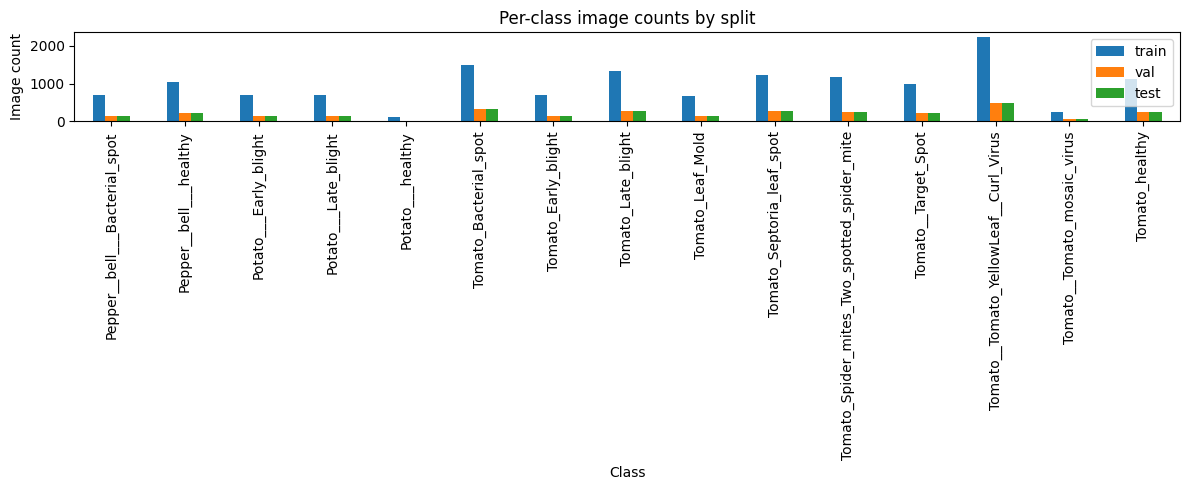

In [4]:
ax = df.plot(kind='bar', figsize=(12, 5))
ax.set_xlabel('Class')
ax.set_ylabel('Image count')
ax.set_title('Per-class image counts by split')
plt.tight_layout()
plt.show()


## Sample Images (Train)

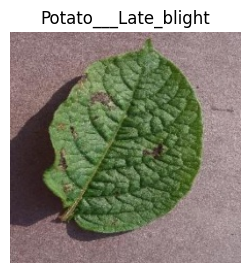

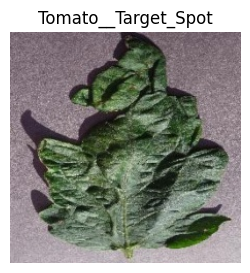

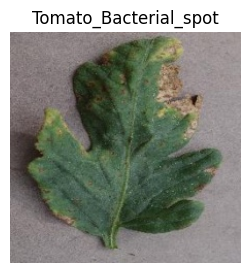

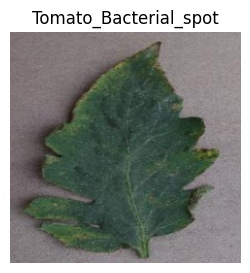

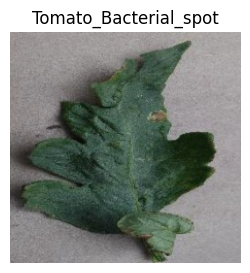

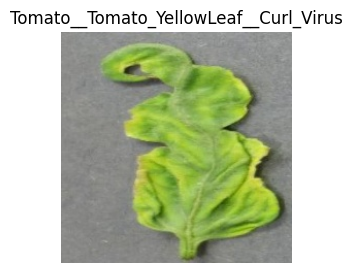

In [5]:
            samples = [
  "/app/data/processed/train/Potato___Late_blight/0441138d-5f9f-4ede-ab9a-49edabc605b3___RS_LB 4235.JPG",
  "/app/data/processed/train/Tomato__Target_Spot/db82e0dc-b6b4-4354-9092-1200792cd4da___Com.G_TgS_FL 8302.JPG",
  "/app/data/processed/train/Tomato_Bacterial_spot/fc48610a-675f-4fdf-998d-5d877c909550___GCREC_Bact.Sp 2959.JPG",
  "/app/data/processed/train/Tomato_Bacterial_spot/55afdd3f-f2f9-419c-aaf6-934c97461b33___GCREC_Bact.Sp 3279.JPG",
  "/app/data/processed/train/Tomato_Bacterial_spot/6651bd20-f9ca-4a0b-b49f-943a535e070a___GCREC_Bact.Sp 6152.JPG",
  "/app/data/processed/train/Tomato__Tomato_YellowLeaf__Curl_Virus/4af9c16d-2976-48f1-bb9a-bf7a3137488a___UF.GRC_YLCV_Lab 03352.JPG"
]
            from pathlib import Path
            for p in samples:
                try:
                    img = Image.open(p).convert('RGB')
                    plt.figure(figsize=(3,3))
                    plt.imshow(img)
                    plt.title(Path(p).parent.name)
                    plt.axis('off')
                    plt.show()
                except Exception as e:
                    print('Could not open', p, e)


## Split Summary

In [6]:
summary = pd.DataFrame({
    'split': ['train', 'val', 'test'],
    'count': [df['train'].sum(), df['val'].sum(), df['test'].sum()]
})
summary


,split,count
0,train,14440
1,val,3097
2,test,3101


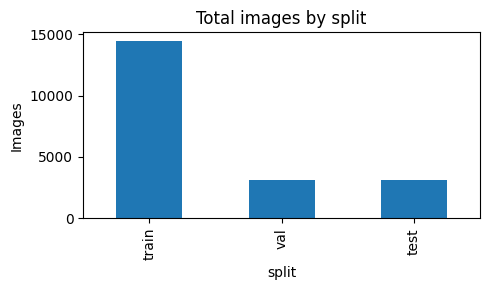

In [7]:
ax = summary.set_index('split').plot(kind='bar', figsize=(5,3), legend=False)
ax.set_ylabel('Images')
ax.set_title('Total images by split')
plt.tight_layout()
plt.show()


## Notes

- Images were resized to **224×224** during preprocessing.
- **Normalization** (mean/std) is applied at **training time** in the dataloader.
- Shown classes reflect filtered crops (e.g., Tomato / Potato / Corn).
- This notebook is **auto-generated**; re-run the report script to refresh after dataset changes.